In [244]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression

from scipy import stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

In [269]:
#data = pd.read_csv("2017_2018_min30_advanced_player_season_totals.csv")
#positions = pd.read_csv("positions.csv")

season="2000-2001 Season"

#data=pd.read_csv("2009-2010_min30_advanced_player_season_totals.csv")

data=pd.read_csv("2000-2001_min30_advanced_player_season_totals.csv")

#print(data.shape)
#print(positions.shape)
print(list(data.columns))
#data["positions"] = positions - 1
#print(data.shape)
data.head()

['player_efficiency_rating', 'true_shooting_percentage', 'three_point_attempt_rate', 'free_throw_attempt_rate', 'offensive_rebound_percentage', 'defensive_rebound_percentage', 'total_rebound_percentage', 'assist_percentage', 'steal_percentage', 'block_percentage', 'turnover_percentage', 'usage_percentage', 'offensive_win_shares', 'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes', 'offensive_box_plus_minus', 'defensive_box_plus_minus', 'box_plus_minus', 'value_over_replacement_player', 'positions']


,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,...,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,positions
0,16.7,0.514,0.057,0.118,1.2,4.7,2.9,32.7,1.0,0.1,...,26.8,0.7,0.0,0.7,0.070,1.1,-2.1,-1.0,0.1,0
1,19.1,0.549,0.050,0.415,6.2,19.6,13.0,14.3,1.5,1.6,...,24.6,5.6,2.9,8.5,0.126,1.7,0.1,1.8,3.1,2
2,6.8,0.404,0.056,0.253,4.9,9.9,7.5,6.9,1.7,0.5,...,21.1,-0.5,0.4,-0.1,-0.013,-5.5,-0.8,-6.2,-0.5,0
3,22.9,0.610,0.357,0.299,3.7,11.8,7.8,20.4,2.1,0.5,...,24.4,11.5,2.2,13.7,0.211,5.7,-0.3,5.5,5.9,1
4,12.1,0.429,0.357,0.155,1.6,10.6,6.1,34.6,2.4,0.0,...,17.2,0.1,0.2,0.3,0.055,-1.6,-0.5,-2.1,0.0,0


In [270]:
X = data.drop(columns=["positions"])
y = data["positions"]

In [272]:
"""
Remove significant outliers from data using Z-score
"""
z = np.abs(stats.zscore(X))
X = X[(z < 7).all(axis=1)]
y = y[(z < 7).all(axis=1)]
X.shape

(345, 20)

In [16]:
def plot_KMeans(X, y, pcaGraph, season):
    """
    Do KMeans on the given data, plot graph
    """
    kmeans = KMeans(n_clusters = 5, n_init=100)
    predict = kmeans.fit_predict(X)
    accuracy = accuracy_score(y, predict)
    print(confusion_matrix(y, predict))
    print(accuracy)

    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=predict, cmap=plt.cm.get_cmap('rainbow',5))

    if(pcaGraph):
        plt.title("KMeans with PCA: " + season)
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
        plt.savefig("./graphs/PCA_KMeans " + season + ".png")
    else:
        plt.title("KMeans with LDA: " + season)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.savefig("./graphs/LDA_KMeans " + season + ".png")
    plt.show()

In [17]:
def plot_GMM(X, y, pcaGraph, season):
    """
    Gaussian Mixture Model:
    """
    gm = GaussianMixture(n_components = 5, n_init = 100)
    predict = gm.fit_predict(X)

    print(confusion_matrix(y, predict))
    print(accuracy_score(y, predict))

    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=predict, cmap=plt.cm.get_cmap('rainbow',5))
    
    if(pcaGraph):
        plt.title("GMM with PCA: " + season)
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
        plt.savefig("./graphs/PCA_GMM " + season + ".png")
    else:
        plt.title("GMM with LDA: " + season)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.savefig("./graphs/LDA_GMM " + season + ".png")

    plt.show()

[0.82342161 0.13793468 0.02829428 0.01034942]


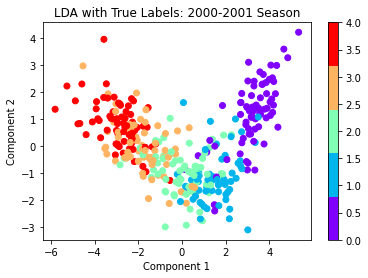

In [273]:
"""
Apply PCA and graph the true labels
"""
#pca = PCA(n_components = 4)
#X_new = pca.fit_transform(X)
#pcaGraph=True
#print(pca.explained_variance_ratio_)

lda = LinearDiscriminantAnalysis(n_components=4)
X_new = lda.fit_transform(X, y)
pcaGraph=False
print(lda.explained_variance_ratio_)

fig = plt.figure()
plt.scatter(X_new[:,0], X_new[:,1], c=y, cmap=plt.cm.get_cmap('rainbow',5))
plt.colorbar()
if(pcaGraph):
    plt.title("PCA with True Labels: " + season)
    plt.xlabel("Principle Component 1")
    plt.ylabel("Principle Component 2")
    plt.savefig("./graphs/PCA_True " + season + ".png")
else:
    plt.title("LDA with True Labels: " + season)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.savefig("./graphs/LDA_True " + season + ".png")
plt.show()

[[ 0 11  4  0 59]
 [ 0 47  7  0  4]
 [ 2 18 44  4  2]
 [ 6  2 20 43  0]
 [39  0  2 31  0]]
0.3884057971014493


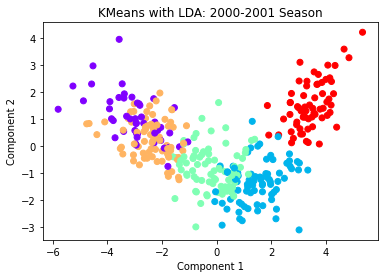

In [166]:
plot_KMeans(X_new, y, pcaGraph, season)

[[61  0  7  6  0]
 [ 7  0 42  6  3]
 [ 1  2 32  6 29]
 [ 0 15  6  6 44]
 [ 0 31  0  0 41]]
0.4057971014492754


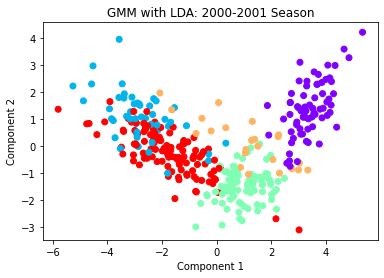

In [241]:
plot_GMM(X_new, y, pcaGraph, season)

In [28]:
def plot_NuSVC(X, y, pcaGraph, season):
    """
    Trains and plots the Nu SVC Model using cross validation
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    param_grid = [
        {'nu': [0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7], 'kernel':['rbf', 'sigmoid'], 'gamma':["auto", 0.1, 0.01, 0.001]},
         {'nu': [0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7], 'kernel':['poly'], 'gamma':["auto", 0.1, 0.01, 0.001], 'degree':[1,2,3,4,5,6,7,8,9]}
    ]

    cv = GridSearchCV(estimator = NuSVC(), param_grid = param_grid, n_jobs=-1, scoring=make_scorer(accuracy_score), verbose=2)
    cv.fit(X_train, y_train)
    print(cv.best_params_)
    predict = cv.best_estimator_.predict(X_test)

    print(accuracy_score(y_test, predict))
    print(confusion_matrix(y_test, predict))

    predict = cv.predict(X_new)

    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=predict, cmap=plt.cm.get_cmap('rainbow',5))
    
    if(pcaGraph):
        plt.title("Nu SVC with PCA: " + season)
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
        plt.savefig("./graphs/PCA_NuSVC " + season + ".png")
    else:
        plt.title("Nu SVC with LDA: " + season)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.savefig("./graphs/LDA_NuSVC " + season + ".png")

    plt.show()


Fitting 5 folds for each of 748 candidates, totalling 3740 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3740 out of 3740 | elapsed:    1.7s finished
{'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.575}
0.8115942028985508
[[14  1  1  0  0]
 [ 0 11  1  0  0]
 [ 0  1  6  1  0]
 [ 0  0  3 11  3]
 [ 0  0  0  2 14]]


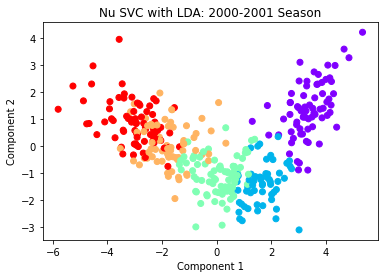

In [223]:
plot_NuSVC(X_new, y, pcaGraph, season)

In [32]:
def plot_gradient_boosting(X, y, pcaGraph, season):
    """
    Gradient Boosting
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    gradientBoost = GradientBoostingClassifier(n_estimators=400)
    gradientBoost.fit(X_train, y_train)
    predict = gradientBoost.predict(X_test)

    print(confusion_matrix(y_test, predict))
    print(accuracy_score(y_test, predict))

    predict = gradientBoost.predict(X)

    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=predict, cmap=plt.cm.get_cmap('rainbow',5))
    
    if(pcaGraph):
        plt.title("Gradient Boosting with PCA: " + season)
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
        plt.savefig("./graphs/PCA_Gradient_Boosting " + season + ".png")
    else:
        plt.title("Gradient Boosting with LDA: " + season)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.savefig("./graphs/LDA_Gradient_Boosting " + season + ".png")

    plt.show()

[[23  3  0  0  0]
 [ 3 16  7  0  0]
 [ 1  4 13  3  0]
 [ 0  0  2  8  7]
 [ 0  0  0  4 20]]
0.7017543859649122


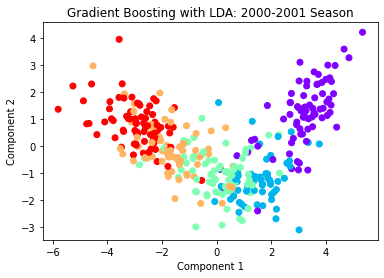

In [212]:
plot_gradient_boosting(X_new, y, pcaGraph, season)

In [34]:
def plot_random_forest(X, y, pcaGraph, season):
    """
    Random Forest
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    forest = RandomForestClassifier(n_estimators = 400, n_jobs = -1, verbose = 0)
    forest.fit(X_train, y_train)
    predict = forest.predict(X_test)

    print(confusion_matrix(y_test, predict))
    print(accuracy_score(y_test, predict))

    predict = forest.predict(X)

    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=predict, cmap=plt.cm.get_cmap('rainbow',5))
    
    if(pcaGraph):
        plt.title("Random Forest with PCA: " + season)
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
        plt.savefig("./graphs/PCA_Random_Forest " + season + ".png")
    else:
        plt.title("Random Forest with LDA: " + season)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.savefig("./graphs/LDA_Random_Forest " + season + ".png")

    plt.show()

[[27  1  0  0  0]
 [ 2 12  2  0  0]
 [ 2  3 14  2  1]
 [ 0  0  4 14  4]
 [ 0  0  1  5 20]]
0.7631578947368421


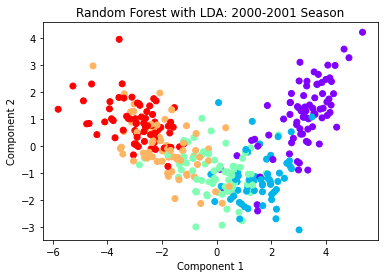

In [218]:
plot_random_forest(X_new, y, pcaGraph, season)

In [242]:
def plot_log_reg(X, y, pcaGraph, season):
    """
    Logistic Regression
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    logisticRegr = LogisticRegression(max_iter = 10000)
    logisticRegr.fit(X_train, y_train)
    predict = logisticRegr.predict(X_test)

    print(confusion_matrix(y_test, predict))
    print(accuracy_score(y_test, predict))

    predict = logisticRegr.predict(X)

    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c=predict, cmap=plt.cm.get_cmap('rainbow',5))
    
    if(pcaGraph):
        plt.title("Logistic Regression with PCA: " + season)
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
        plt.savefig("./graphs/PCA_Logistic_Regression " + season + ".png")
    else:
        plt.title("Logistic Regression with LDA: " + season)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.savefig("./graphs/LDA_Logistic_Regression " + season + ".png")

    plt.show()

[[24  0  3  0  0]
 [ 1 10  5  0  0]
 [ 1  3 16  5  0]
 [ 0  0  4 14  5]
 [ 0  0  0  6 17]]
0.7105263157894737


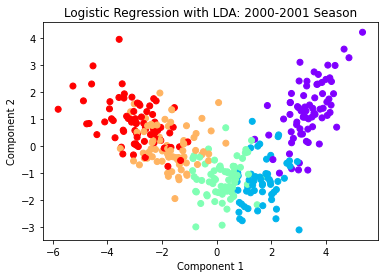

In [277]:
plot_log_reg(X_new, y, pcaGraph, season)

<h1>Neural Network Stuff:</h1>

In [9]:
"""
Initial parameters for the NN
"""
lr = .001
batch_size = 1
epochs = 100

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33)

"""
Create the neural network
"""
def create_net():
  model = Sequential()
  model.add(Dense(5, activation='relu', input_shape=(4,)))
  model.add(Dense(5, activation='sigmoid'))

  model.compile(optimizer=keras.optimizers.SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

model = create_net()

"""
Train the neural network
"""
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
243/243 [==============================] - 0s 992us/step - loss: 1.6350 - accuracy: 0.1399 - val_loss: 1.6043 - val_accuracy: 0.1983
Epoch 2/100
243/243 [==============================] - 0s 539us/step - loss: 1.6060 - accuracy: 0.1317 - val_loss: 1.5800 - val_accuracy: 0.1901
Epoch 3/100
243/243 [==============================] - 0s 551us/step - loss: 1.5834 - accuracy: 0.1399 - val_loss: 1.5614 - val_accuracy: 0.1736
Epoch 4/100
243/243 [==============================] - 0s 539us/step - loss: 1.5651 - accuracy: 0.1605 - val_loss: 1.5461 - val_accuracy: 0.1901
Epoch 5/100
243/243 [==============================] - 0s 531us/step - loss: 1.5498 - accuracy: 0.1687 - val_loss: 1.5329 - val_accuracy: 0.1901
Epoch 6/100
243/243 [==============================] - 0s 535us/step - loss: 1.5364 - accuracy: 0.1770 - val_loss: 1.5208 - val_accuracy: 0.1901
Epoch 7/100
243/243 [==============================] - 0s 535us/step - loss: 1.5246 - accuracy: 0.1770 - val_loss: 1.5098 - val_ac

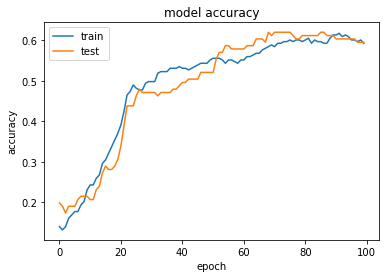

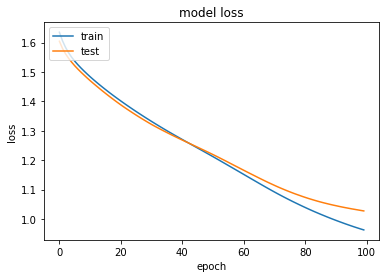

In [10]:
"""
Plot the accuracy and the loss of the neural network
"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summary

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()